# Red Wine Quality

This notebook provides an overview of the data from the below red wine quality dataset, along with visualizations. 

It then utilizes linear regression, random forest classifier, and logistic regression to predict the quality of the wine.

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style("whitegrid")
plt.style.use('ggplot')
sns.set_palette('deep')

## First look at data

In [3]:
wine = pd.read_csv('../data/redwine_quality.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.isnull().sum().sum()

#no null cells in the dataframe

0

In [7]:
wine.all()

#just the citric acid column has 0 values

fixed acidity            True
volatile acidity         True
citric acid             False
residual sugar           True
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
quality                  True
dtype: bool

In [8]:
wine[wine['citric acid'] == 0].shape[0]

#132 items have a zero in the citric acid column, but nothing else

132

## Initial trends between quality and numeric variables?

Text(0.5,1,'Number of Quality Ratings')

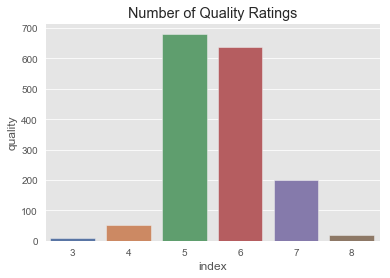

In [10]:
quality_counts = wine['quality'].value_counts().reset_index().sort_values(by = 'index').reset_index(drop=True)
sns.barplot(x = quality_counts['index'], y = quality_counts['quality']).set_title('Number of Quality Ratings')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


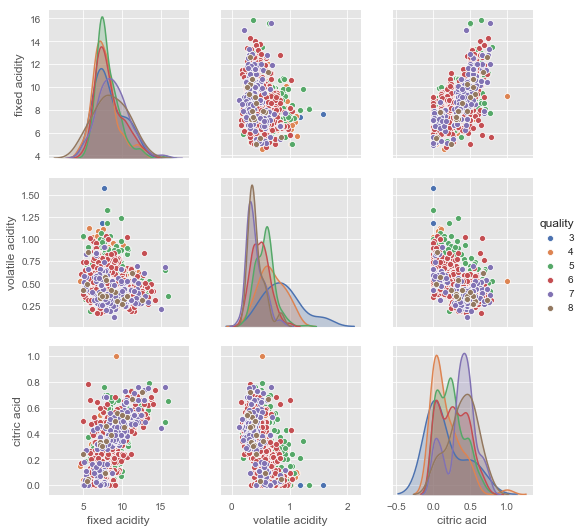

In [11]:
sns.pairplot(wine, hue = 'quality', vars = 
             ['fixed acidity', 'volatile acidity', 'citric acid'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


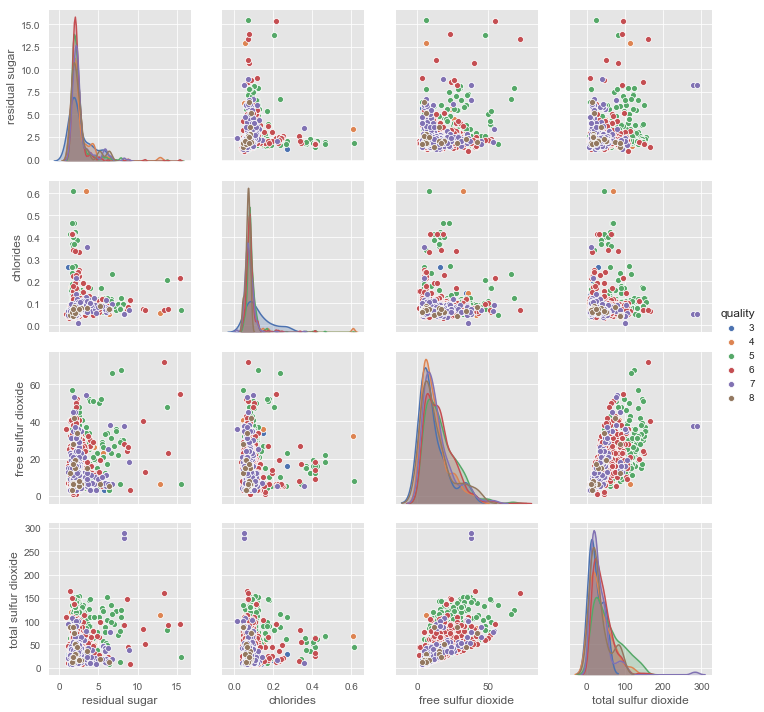

In [12]:
sns.pairplot(wine, hue = 'quality', vars = 
             ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


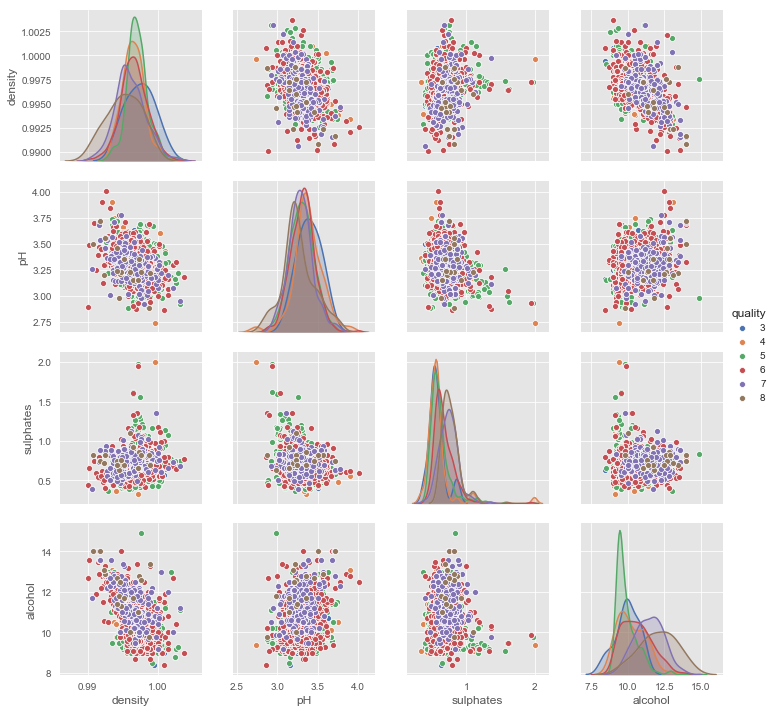

In [13]:
sns.pairplot(wine, hue = 'quality', vars = 
             ['density', 'pH', 'sulphates', 'alcohol'])

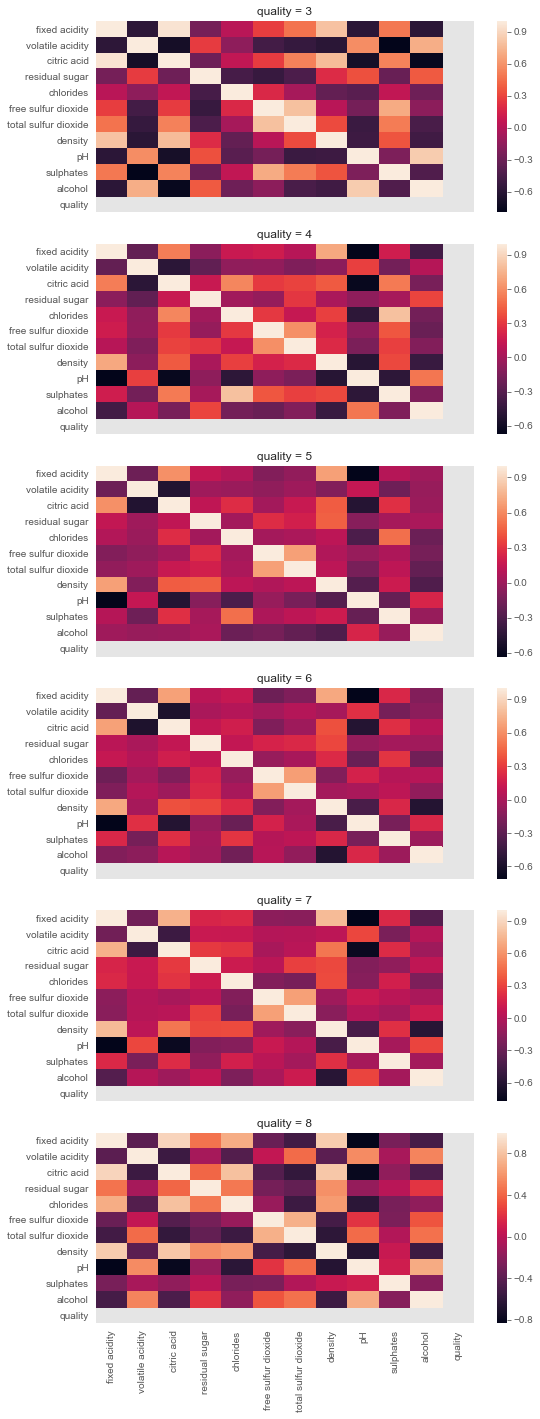

In [14]:
g = sns.FacetGrid(wine, row='quality')
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0))
g.fig.set_size_inches(15,20)

## Overview of acidity variables

In [27]:
#sns.boxplot(x="quality", y="fixed acidity", data=wine)

In [28]:
#wine['fixed acidity'].plot.hist()

In [29]:
#sns.boxplot(x="quality", y="volatile acidity", data=wine)

In [31]:
#wine['volatile acidity'].plot.hist()

In [32]:
#sns.boxplot(x="quality", y="citric acid", data=wine)

In [33]:
#wine['citric acid'].plot.hist()

## Overview of other numeric variables

In [34]:
#sns.stripplot(x="quality", y="residual sugar", data=wine)

In [35]:
#sns.stripplot(x="quality", y="chlorides", data=wine)

In [36]:
#sns.violinplot(x="quality", y="free sulfur dioxide", data=wine)

In [37]:
#sns.violinplot(x="quality", y="total sulfur dioxide", data=wine)

In [38]:
#sns.boxplot(x="quality", y="density", data=wine)

In [39]:
#sns.boxplot(x="quality", y="pH", data=wine)

In [40]:
#sns.stripplot(x="quality", y="sulphates", data=wine)

In [41]:
#sns.stripplot(x="quality", y="alcohol", data=wine)

# Testing Models

## Linear Regression

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression

In [21]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target = ['quality']

X = wine[features]
y = wine[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)

In [24]:
type(y_prediction), type(y_test)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [25]:
test_pred = y_prediction.tolist()
test_list = y_test['quality'].tolist()

In [26]:
linear_reg_output = pd.DataFrame(
    {'predicted': test_pred,
     'actual': test_list
    })

In [27]:
linear_reg_output.head()

,predicted,actual
0,[6.575345719623286],5
1,[5.24961974424869],5
2,[4.9457804128553065],6
3,[5.2154117891531016],5
4,[6.17931858598898],6


In [28]:
linear_reg_output['predicted'] = linear_reg_output['predicted'].astype(str)
linear_reg_output['predicted'] = linear_reg_output['predicted'].str.extract('(\d+)', expand=False)
linear_reg_output = linear_reg_output.astype(int)

In [29]:
linear_reg_output['result the same'] = np.where(linear_reg_output['predicted'] ==
                                       linear_reg_output['actual'], 'yes', 'no')

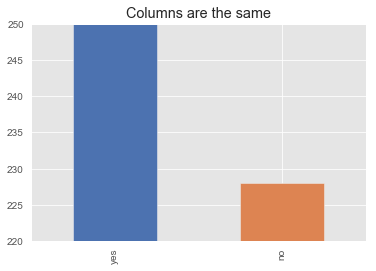

In [30]:
linear_reg_output['result the same'].value_counts().plot.bar()
plt.ylim(220, 250)
plt.title('Columns are the same')
plt.show()

In [31]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [32]:
RMSE = sqrt(mean_squared_error(y_true=test_list, y_pred=test_pred))
print('Root mean squared error:', RMSE)

Root mean squared error: 0.6449574642455853


## Random Forest

pulled examples from: https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

In [273]:
from sklearn.preprocessing import StandardScaler

In [254]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [262]:
wine['binary_quality'] = [1 if x >= 6 else 0 for x in wine['quality']]

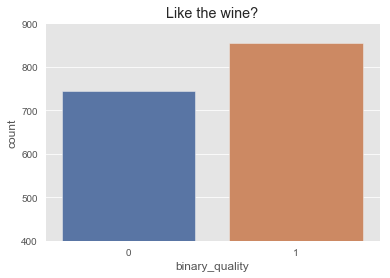

In [269]:
sns.countplot(wine['binary_quality'])
plt.ylim(400, 900)
plt.title('Like the wine?')
plt.show()

In [270]:
y = wine['binary_quality']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size = 0.3)

In [274]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [276]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [278]:
print(confusion_matrix(y_test, pred_rfc))

[[174  51]
 [ 49 206]]


In [280]:
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.78      0.77      0.78       225
          1       0.80      0.81      0.80       255

avg / total       0.79      0.79      0.79       480



In [282]:
rfc_eval = cross_val_score(rfc, X_train, y_train, cv = 10)
rfc_eval.mean()

0.7828828828828829

In [283]:
#visualizing a single decision tree w rfc.estimators_

In [293]:
feature_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [295]:
#for visualizations 

from sklearn.tree import export_graphviz
import pydot

#tree = rfc.estimators_[1]
#export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, 
#rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
#from IPython.display import Image
#Image(filename = 'tree.png')

In [297]:
#feature importances

importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, 
                      importance in zip(feature_list, importances)]

In [299]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [300]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: alcohol              Importance: 0.17
Variable: sulphates            Importance: 0.15
Variable: volatile acidity     Importance: 0.11
Variable: total sulfur dioxide Importance: 0.09
Variable: citric acid          Importance: 0.08
Variable: residual sugar       Importance: 0.07
Variable: chlorides            Importance: 0.07
Variable: density              Importance: 0.07
Variable: pH                   Importance: 0.07
Variable: fixed acidity        Importance: 0.06
Variable: free sulfur dioxide  Importance: 0.05


[None, None, None, None, None, None, None, None, None, None, None]

In [301]:
x_values = list(range(len(importances)))

Text(0.5,1,'Variable Importances')

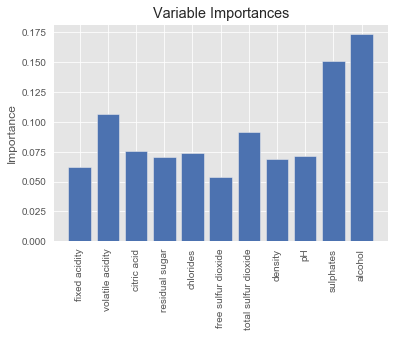

In [307]:
plt.bar(x_values, importances)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.title('Variable Importances')

In [310]:
#figure out which variables are the most important to keep in 

sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.cumsum(sorted_importances)

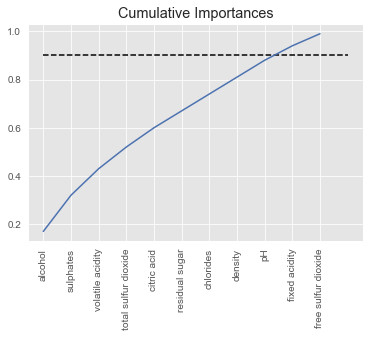

In [319]:
plt.plot(x_values, cumulative_importances)
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), 
           linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.title('Cumulative Importances')
plt.show()

In [328]:
features = ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'citric acid', 
           'residual sugar', 'chlorides', 'density']
target = ['binary_quality']

In [329]:
X = wine[features]
y = wine[target]

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size = 0.3)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [332]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [333]:
print(confusion_matrix(y_test, pred_rfc))

[[189  42]
 [ 66 183]]


In [334]:
print(classification_report(y_test, pred_rfc))
#just very slightly worse than with the other parameters included

             precision    recall  f1-score   support

          0       0.74      0.82      0.78       231
          1       0.81      0.73      0.77       249

avg / total       0.78      0.78      0.77       480



In [336]:
#tuning hyperparameters

rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [338]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [339]:
rfc = RandomForestClassifier()

In [340]:
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = 
                               random_grid, n_iter = 100, cv = 3, 
                               verbose = 2, n_jobs = -1)

In [342]:
rfc_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False 
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False 
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False 
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV] n_estimato

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   1.4s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   1.5s
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, total=   1.5s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=   3.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1200, 

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   0.6s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   2.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   2.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, mi

[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=True, total=   3.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.6s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.7s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.6s
[CV] n_estimators=

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   6.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=   5.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=   5.1s
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   5.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estima

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   36.5s


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   2.0s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=400, min_samp

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.2s
[CV] n_estimators=1400, mi

[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=   4.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, total=   4.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, total=   4.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, total=   4.8s
[CV] n_estimato

[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.1s
[CV] n_estimators=600, m

[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True, total=   3.7s
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   4.9s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=True, total=   3.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   5.0s
[CV] n_estimators=800, mi

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [347]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [355]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': [4, 5, 6], 
    'min_samples_leaf': [1, 2], 
    'max_depth': [40, 50, 60],
    'bootstrap': [True]
}

In [356]:
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [357]:
grid_search.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=4 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=4 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=4 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=5 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=5 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=5 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=6 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=6 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=6 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV] bootstrap=True, max_depth=40, min_samples_leaf=2, min_samples_split=4 
[CV]  bootstrap=True, max_d

[CV] bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=6 
[CV]  bootstrap=True, max_depth=60, min_samples_leaf=2, min_samples_split=5, total=   0.0s
[CV] bootstrap=True, max_depth=60, min_samples_leaf=2, min_samples_split=6 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=5, total=   0.0s
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV]  bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=5, total=   0.0s
[CV]  bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV]  bootstrap=True, max_depth=60, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV]  bootstrap=True, max_depth=60, min_samples_leaf=2, min_samples_split=6, total=   0.0s


[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [4, 5, 6], 'min_samples_leaf': [1, 2], 'max_depth': [40, 50, 60], 'bootstrap': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [358]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [359]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [360]:
best_grid = grid_search.best_estimator_

In [362]:
predictions = best_grid.predict(X_test)

In [364]:
print(confusion_matrix(y_test, predictions))

[[168  63]
 [ 52 197]]


In [365]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.76      0.73      0.75       231
          1       0.76      0.79      0.77       249

avg / total       0.76      0.76      0.76       480

